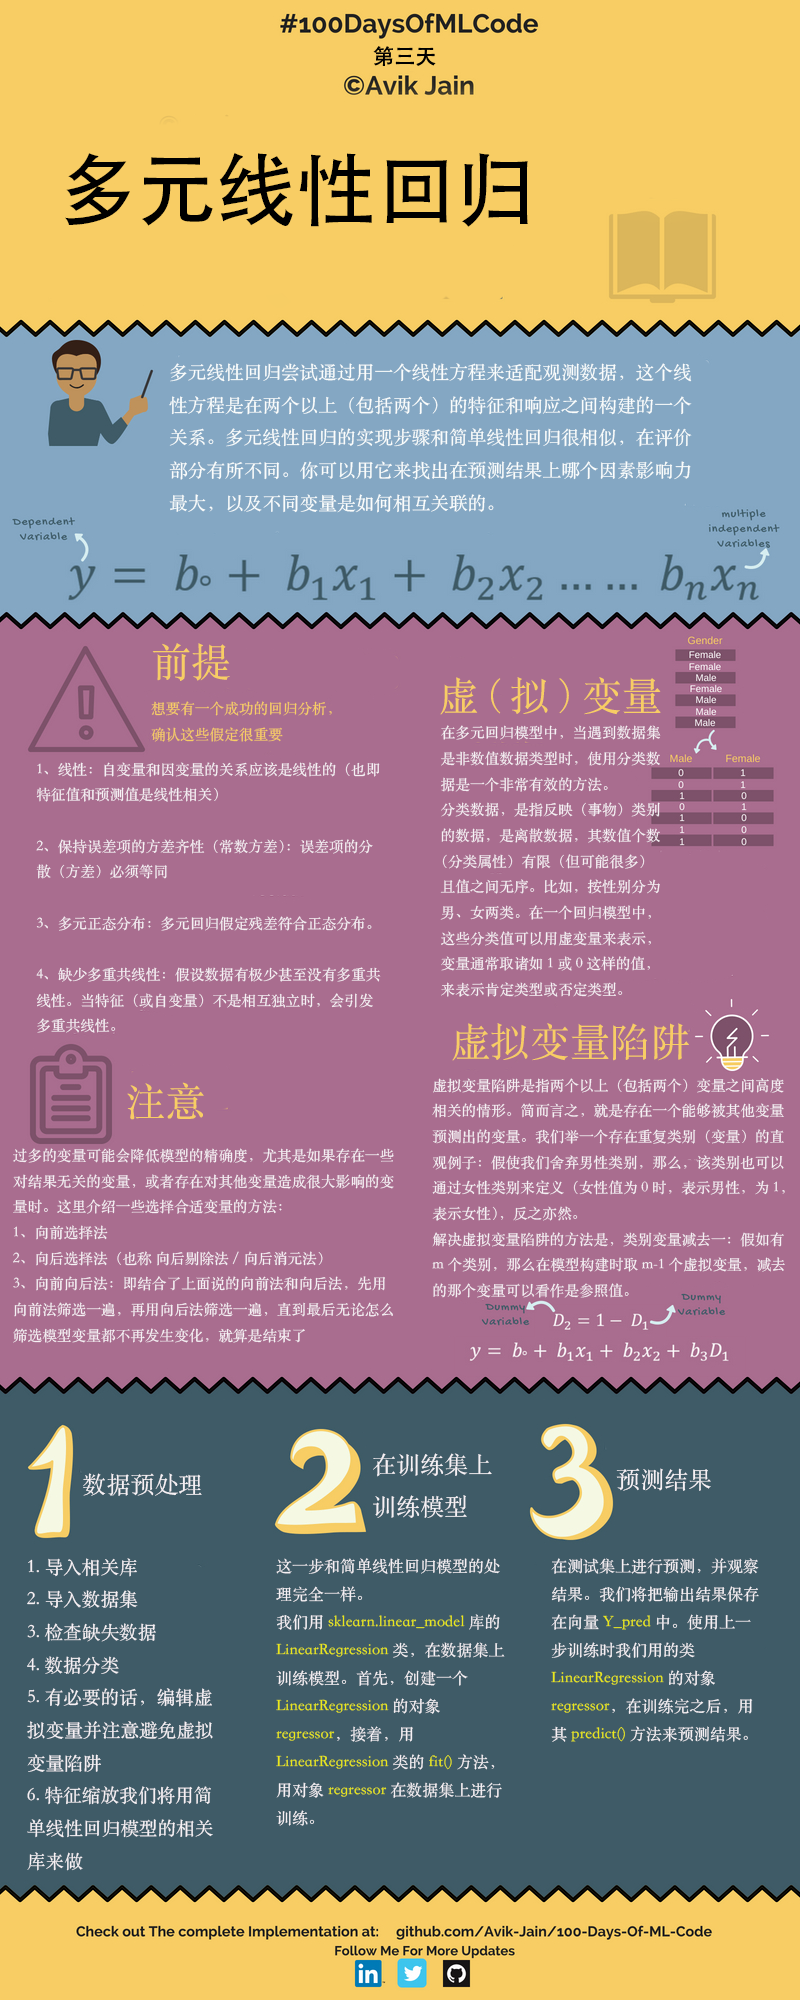

In [1]:
import numpy as np
import pandas as pd

In [2]:
datasets=pd.read_csv("datasets/50_Startups.csv")

In [5]:
X=datasets.iloc[:,:-1].values
y=datasets.iloc[:,-1].values

In [6]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x=LabelEncoder()
X[:,3]=labelencoder_x.fit_transform(X[:,3])
onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()

e:\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# 躲避虚拟变量陷阱，因为两个虚拟变量就可以代表三个类别的情况所以删去其中一个虚拟变量

In [9]:
X=X[:,1:]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
y_pred=regressor.predict(X_test)

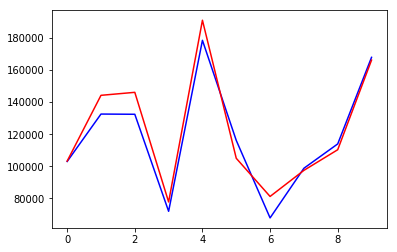

In [19]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(y_pred))),y_pred,color='blue')
plt.plot(list(range(len(y_test))),y_test,color='red')
# plt.legend(True)
plt.show()

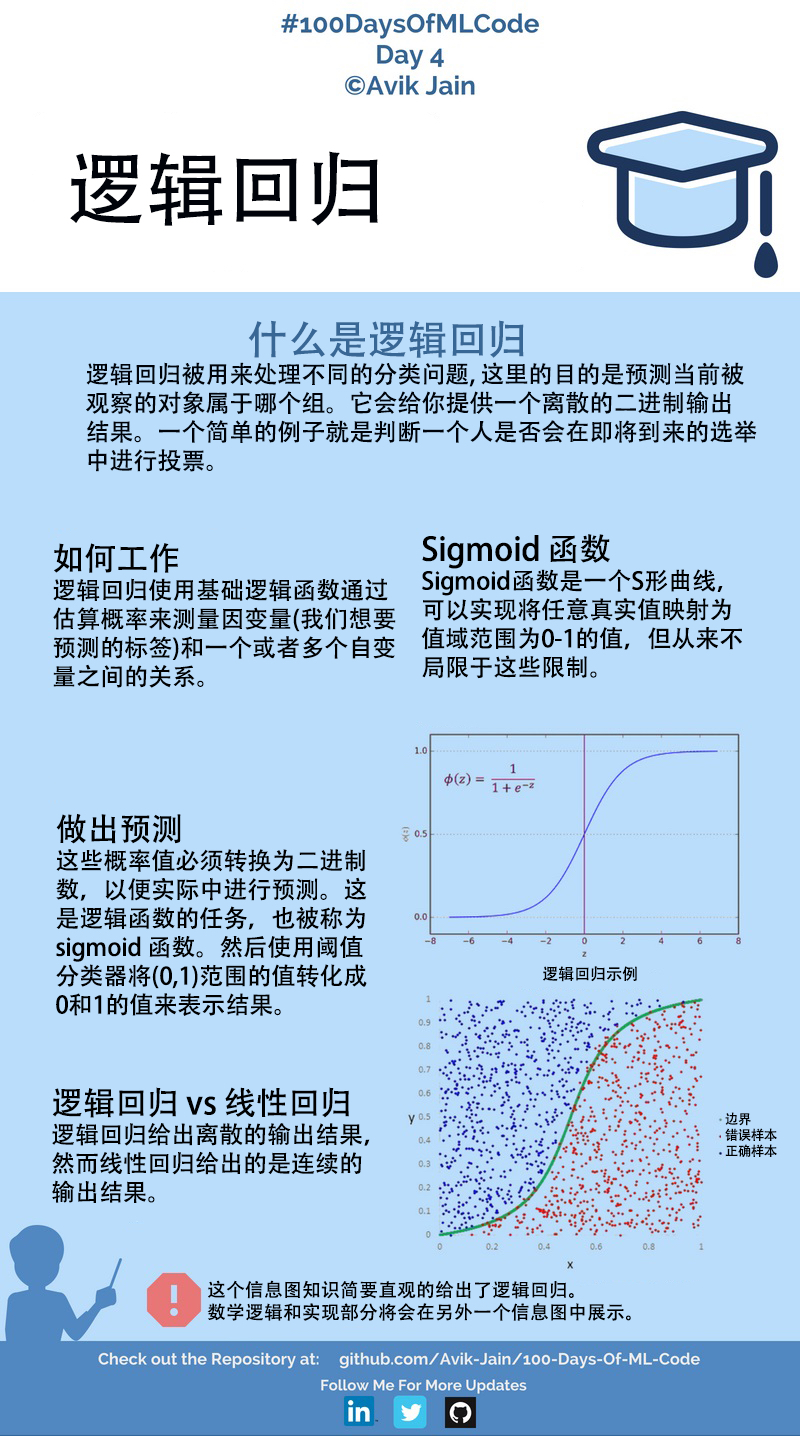

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
dataset=pd.read_csv('datasets/Social_Network_Ads.csv')
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [26]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# 特征缩放

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [32]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [47]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

e:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred=classifier.predict(X_test)

# 生成混淆矩阵

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [50]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [51]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train

In [52]:
X1,X2=np. meshgrid(np.arange(X_set[:,0].min()-1,X_set[:,0].max()+1,0.01),
                  np.arange(X_set[:,1].min()-1,X_set[:,1].max()+1,0.01))

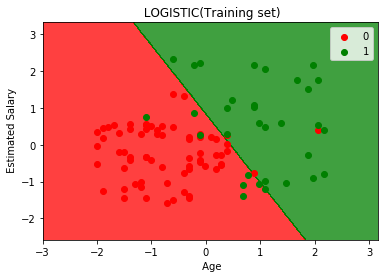

0 0
1 1


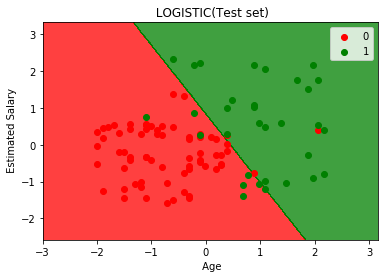

In [58]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)
plt. title(' LOGISTIC(Training set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()
X_set,y_set=X_test,y_test
X1,X2=np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC(Test set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()